![](logo.png)

# Data Analytics Meetings
### We are starting this group to meet, review, and of course, learn about the fundamentals of Data Analytics.


### About the data jam

The idea is to work in small teams to visualize a new data set in **X** amount of time. 
We announce the actual data set at the beginning of the event. 
All jams are tool agnostic, so use what you're already comfortable with or try something new.

The goal is to learn from each other by producing many visualizations on a common data set;
we'll often identify interesting patterns, 
but more importantly we get to quickly compare design choices, statistical methods, tool choices, failures and successes.

### Short presentation (Lightning talks)
A short presentions to share a topic of interest.
Below is a quick example on how to connect your Jupyter notebook to a database.


### Meeting Location

* Place- Tøyen Bibilotek (Tøyen library)
* Time- 14:00-16:00
        
<div class="admonition note alert alert-info">

<p class="first admonition-title" style="font-size: 20px style=" font-weight: bold;">We want:</p>
<p class="last" style="font-weight: bold>">Data enthusiasts.
<p class="last" style="font-weight: bold>">Data related topics.
<p class="last" style="font-weight: bold>">Participation (Not obligatory, but encouraged).
<p class="last" style="font-weight: bold>">To share your data analytics story.
<p class="last" style="font-weight: bold>">Test our knowledge of data visualization tools of your choice.

</p>
</div>


<div id='id-sql_connect'/>

## CONNECTING JUPYTER TO MICROSOFT SQL

# Table of content
- [TOPIC INTRODUCTION](#id-Introduction)
    
- [CONNECTING JUPYTER TO MICROSOFT SQL](#id-sql_connect)
    
- [CREATE A NEW TABLE](#id-new_table)
    - [SKILL: PANDAS,SQL SYNTAX](#id-pdsql)
    
- [VISUALIZATION](#id-vis)
 

<div id='id-Introduction'/>

## TOPIC INTRODUCTION 



We will be using the package **pyodbc** 
to connect to a SQL database. We will review basic SQL syntax, and the relational database model. Then, we'll try out an analysis from data stored in a database and write our results back to the database.

In particular, we will revisit *SPREADSHEET FUNDAMENTALS - MODULE 1*, where we created tables and inserted values, if you recall. 
Then, we will use a Jupyter notebook to wrangle data and use the knowledge we're learning in *EVALUATION OF OUTCOMES - MODULE 3* 


###  Connecting to a Microsoft SQL Server with Python the package pyodbc

* First, import the packages. 
    * *pyodbc* is an open-source Python module to access your SQL Server. 
    * *pandas* a high-level data manipulation tool.
    * *numpy* to facilitates efficient numerical operations on large quantities of data.
    * *matplotlib.pyplot*: a comprehensive library for creating static, animated, and interactive visualizations in Python
    * *datetime* to manipulate dates    
* Create a connection.
    * check for drivers.
* Query some data.
    * use SQL syntax and pandas to query data.

### Load your packages

In [179]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# use pip install if mododule is not found. 
# !pip list or !pip freeze checks generates a list of your installed packages.
# pip install pyodbc
import pyodbc





<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>

#### [Click to read pyodbc documentation](https://learn.microsoft.com/en-us/sql/connect/python/pyodbc/step-3-proof-of-concept-connecting-to-sql-using-pyodbc?view=sql-server-ver16)

In [78]:
# check for drivers

pyodbc.drivers() # creates a list of drivers installed in your computer

['SQL Server',
 'PostgreSQL ANSI(x64)',
 'PostgreSQL Unicode(x64)',
 'ODBC Driver 17 for SQL Server',
 'Amazon Redshift (x64)',
 'SQL Server Native Client 11.0',
 'ODBC Driver 11 for SQL Server']

### Creating a connection

In [146]:
import pyodbc
conn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                  'Server=DESKTOP-7002NRT\SQLEXPRESS;'
                  'Database=rider;'
                  'Trusted_Connection=yes;')
cursor = conn.cursor()
cursor# A cursor is an object which helps to execute the query and fetch the records

In [145]:
# optional
cursor.execute("SELECT @@version;")
row = cursor.fetchone()
row

('Microsoft SQL Server 2014 - 12.0.2269.0 (X64) \n\tJun 10 2015 03:35:45 \n\tCopyright (c) Microsoft Corporation\n\tExpress Edition (64-bit) on Windows NT 6.3 <X64> (Build 19044: )\n', )

### Test connection

In [81]:
# returs a list of tuples. 
cursor = conn.cursor()
cursor.execute("select * from dbo.Rider") #SQL syntax to query data
rows = cursor.fetchall()


In [128]:
# But this next line of code return a table! 
query = "select * from dbo.Rider" #SQL syntax to query data
table = pd.read_sql(query, conn) # the 
table.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:00,556753,2021-01-26,2021-01-26 02:21:00,2021-01-26 02:22:00,2021-01-26 02:32:00,2021-01-26 02:49:00,11696,1.5666,2.65,46,46.0,0,0,621.0,,,,,1753-01-01
1,2021-01-26 02:33:00,556754,2021-01-26,2021-01-26 02:33:00,2021-01-26 02:34:00,2021-01-26 02:50:00,2021-01-26 03:11:00,18117,2.5207,2.76,8,8.0,0,0,105.0,,,,3.266666667,1753-01-01
2,2021-01-26 02:39:00,556755,2021-01-26,2021-01-26 02:39:00,2021-01-26 02:40:00,2021-01-26 02:56:00,2021-01-26 03:12:00,18623,2.2074,4.80,1,1.0,0,0,66.0,,,,9.816666667,1753-01-01
3,2021-01-26 02:47:00,556756,2021-01-26,2021-01-26 02:48:00,2021-01-26 02:49:00,2021-01-26 03:21:00,2021-01-26 03:41:00,15945,2.1894,6.38,1,1.0,0,0,127.0,,,,17.53333333,1753-01-01
4,2021-01-26 03:06:00,556757,2021-01-26,2021-01-26 03:07:00,2021-01-26 03:07:00,2021-01-26 03:31:00,2021-01-26 04:00:00,17589,2.7870,4.01,34,34.0,0,0,84.0,,,,1.35,1753-01-01


<div id='id-new_table'/>

## CREATE A NEW TABLE

### New table based on conditions
In this exercise I will create a new table and name it *Orde_tble*

* Check data type before wrangling data.
* Create columns: DAY, MONTH, WEEK
* Select columns for new table    



<div id='id-pdsql'/>

#### PRACTICE PANDAS, SQL SYNTAX

In [158]:
# check data type
# order_date has the correct format. 
# Select data for new table
# Create copy of table
df = table.copy() 
df.info()
type(df)
df.columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  object        
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           450000 non-null  datetime64[ns]
 5   pickup_time           450000 non-null  datetime64[ns]
 6   delivered_time        450000 non-null  datetime64[ns]
 7   rider_id              450000 non-null  object        
 8   first_mile_distance   450000 non-null  float64       
 9   last_mile_distance    450000 non-null  float64       
 10  alloted_orders        450000 non-null  object        
 11  delivered_orders      450000 non-null  float64       
 12  cancelled             450000 non-null  object        
 13 

(450000, 20)

In [159]:
#count duplicates
df[df.duplicated()]

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
401538,2021-02-05 15:06:00,181402,2021-02-05,2021-02-05 16:32:00,2021-02-05 16:33:00,1753-01-01,1753-01-01,14538,2.6168,1.24,72,72.0,1,0,244.0,auto,Reassign,1,96.5,2021-02-05 16:59:00


In [163]:
df1= df.drop_duplicates() # created new object to compare before and after removing duplicates. 

In [164]:
df1[df1.duplicated()]

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time


In [166]:
df1.shape

(449999, 20)

#### Create a new table

* The *.loc* attribute is used to access a group of rows and columns of a DataFrame by using their labels.


In [171]:

Order_table=df1.loc[:,['order_id','order_date','first_mile_distance','last_mile_distance']]
Order_table.head(3)

,order_id,order_date,first_mile_distance,last_mile_distance
0,556753,2021-01-26,1.5666,2.65
1,556754,2021-01-26,2.5207,2.76
2,556755,2021-01-26,2.2074,4.80


#### Create columns based on date columns

In [172]:
Order_table['Month'] = Order_table['order_date'].dt.month
Order_table['Year']=Order_table['order_date'].dt.year
Order_table['Hour']=Order_table['order_date'].dt.hour
Order_table.head(3)

,order_id,order_date,first_mile_distance,last_mile_distance,Month,Year,Hour
0,556753,2021-01-26,1.5666,2.65,1,2021,0
1,556754,2021-01-26,2.5207,2.76,1,2021,0
2,556755,2021-01-26,2.2074,4.80,1,2021,0


#### Create table using SQL syntax and the object cursor


In [168]:
cursor.execute('''
CREATE TABLE Orde_tble (
order_id int ,
order_date datetime,
first_mile_distance float,
last_mile_distance float,
Month int,
Year int,
Hour int,

)
         ''')

conn.commit()

#### Insert new values into the table


<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>

#### [Click to read pyodbc documentation](https://learn.microsoft.com/en-us/sql/machine-learning/data-exploration/python-dataframe-sql-server?view=sql-server-ver16)

In [170]:
cursor.fast_executemany = True
for index, row in Order_table.iterrows():
     cursor.execute("INSERT INTO Orde_tble(order_id,order_date,first_mile_distance,\
     last_mile_distance,Month,Year,Hour) values(?,?,?,?,?,?,?)", row.order_id, row.order_date, row.first_mile_distance, row.last_mile_distance, row.Month,row.Year,row.Hour)
conn.commit()
cursor.close()

#### Check your data migration

* Check your database and look for the new table and values.

![](Capture.png)


<div id='id-vis'/>

#### DATA VISUALIZATION

These plots are simply to ullustrate possible analysis one can performed once we are able to connect to the data base. 

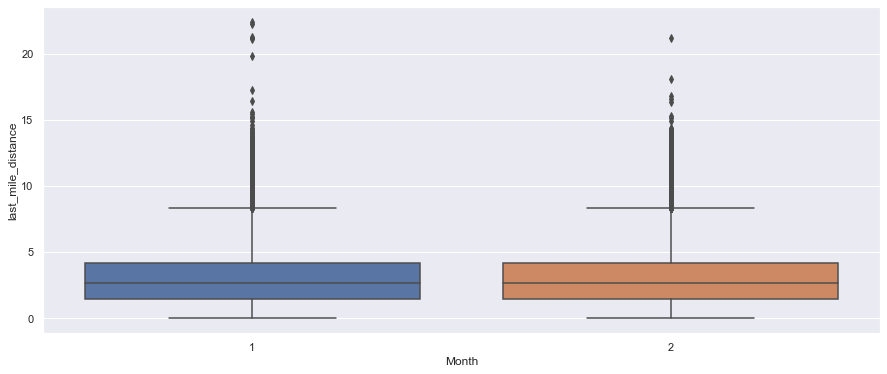

In [198]:
plt.figure(figsize = (15,6))
sns.boxplot(x=Order_table['Month'],y=Order_table['last_mile_distance'], data = Order_table)

plt.show()




<AxesSubplot:xlabel='first_mile_distance', ylabel='last_mile_distance'>

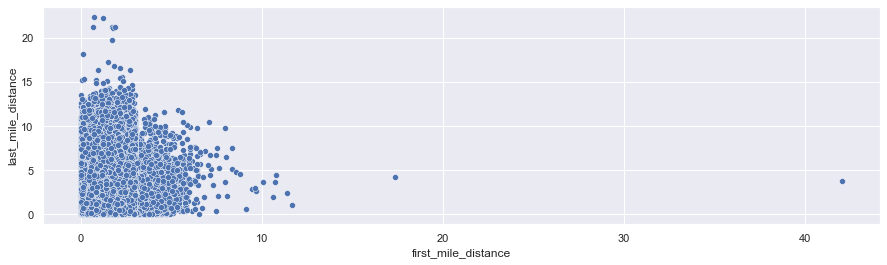

In [188]:
sns.set(rc={"figure.figsize":(15, 4)})
sns.scatterplot(data=Order_table, x="first_mile_distance", y="last_mile_distance")